# Random Forest Classifier
## 1. Theory

## 2. Objective
Features:
- RSI
- Moving Averages
- Bollinger Bands

In [17]:
from utils import evaluate_model

[*********************100%***********************]  1 of 1 completed



random forest Evaluation Metrics:
Accuracy: 54.64%

Confusion Matrix:
[[ 91  96]
 [ 85 127]]

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.49      0.50       187
           1       0.57      0.60      0.58       212

    accuracy                           0.55       399
   macro avg       0.54      0.54      0.54       399
weighted avg       0.54      0.55      0.55       399

ROC AUC Score: 0.55


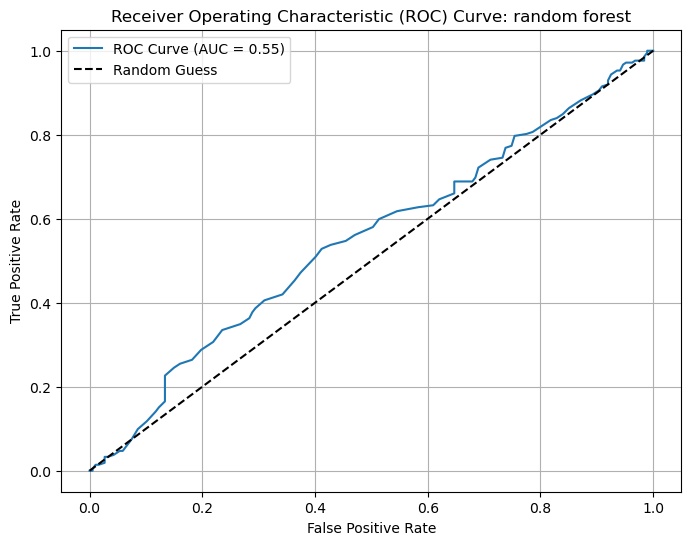

In [18]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import yfinance as yf
import talib as ta

# Fetch historical data
data = yf.download('AAPL', start='2015-01-01', end='2023-01-01')

# Calculate indicators
# Correctly convert data before passing to TA-Lib
# Ensure 'Close' column is a 1D array
data['SMA50'] = ta.SMA(data['Close'].to_numpy().squeeze(), timeperiod=7)
data['SMA200'] = ta.SMA(data['Close'].to_numpy().squeeze(), timeperiod=14)
data['RSI'] = ta.RSI(data['Close'].to_numpy().squeeze(), timeperiod=14)
data['UpperBB'], data['MiddleBB'], data['LowerBB'] = ta.BBANDS(data['Close'].to_numpy().squeeze(), timeperiod=20)



# Prepare the dataset
data.dropna(inplace=True)
data['Target'] = np.where(data['Close'].shift(-1) > data['Close'], 1, 0)
features = data[['SMA50', 'SMA200', 'RSI', 'UpperBB', 'LowerBB']]
labels = data['Target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
evaluate_model(model, X_train, X_test, y_train, y_test, model_name="random forest")


# Generate buy/sell signals
data['Prediction'] = model.predict(features)
data['Buy'] = np.where(data['Prediction'] == 1, 1, 0)
data['Sell'] = np.where(data['Prediction'] == 0, -1, 0)

# Export signals to a CSV file
#data[['Buy', 'Sell']].to_csv('signals.csv')

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 20, 'bootstrap': False}

Random Forest (Tuned) Evaluation Metrics:
Accuracy: 52.88%

Confusion Matrix:
[[ 79 108]
 [ 80 132]]

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.42      0.46       187
           1       0.55      0.62      0.58       212

    accuracy                           0.53       399
   macro avg       0.52      0.52      0.52       399
weighted avg       0.53      0.53      0.52       399

ROC AUC Score: 0.53


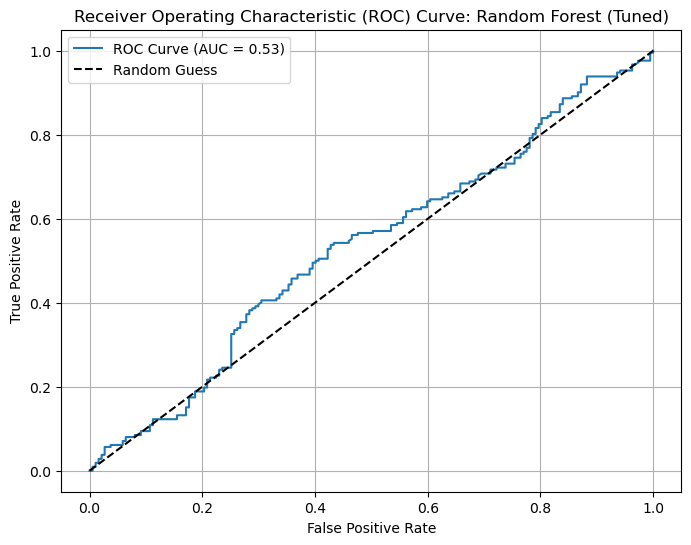

In [19]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier(random_state=42)
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Perform hyperparameter tuning and evaluation
random_search.fit(X_train, y_train)
best_rf = random_search.best_estimator_
print("Best Parameters for Random Forest:", random_search.best_params_)
evaluate_model(best_rf, X_train, X_test, y_train, y_test, model_name="Random Forest (Tuned)")


In [20]:
import os
print(os.listdir())  # Lists the files in the current directory


['SVMs.ipynb', 'HiddenMarkovModel.ipynb', 'model_ep0', 'Reinforcement_Model.ipynb', 'MovingAverage_Preliminary.ipynb', '__pycache__', 'utils.py', 'Agent1.csv', 'quant_env', 'Agent0.csv', '.ipynb_checkpoints', 'Random_Forest.ipynb', 'signals.csv', '.git', 'installed_packages.txt']
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END boot